In [1]:
import inspect
import librosa
print(inspect.getfile(librosa)) # random 모듈의 위치

C:\Users\choic\anaconda3\lib\site-packages\librosa\__init__.py


In [2]:
import librosa
from matplotlib import pyplot as plt
import sounddevice as sd

In [4]:
example_file_path = librosa.ex('trumpet')
print(f'예제 파일은 다음 위치에 있습니다.\n파일 경로: {example_file_path}')

예제 파일은 다음 위치에 있습니다.
파일 경로: C:\Users\choic\AppData\Local\librosa\librosa\Cache\sorohanro_-_solo-trumpet-06.ogg


In [8]:
y, sr = librosa.load(example_file_path)
# y는 소리의 Amplitude 벡터, sr은 Sampling Rate를 의미

In [15]:
sd.play(y)

### [벡터 값 20개 출력]

In [17]:
print(f' {y}\nsampling_rate : {sr}')

 [-1.4068224e-03 -4.4607223e-04 -4.1098078e-04 ...  7.9623060e-06
 -3.0417003e-05  1.2765067e-05]
sampling_rate : 22050


### [벡터 길이 출력]

In [18]:
print(f'y는 {len(y)} 길이의 벡터')

y는 117601 길이의 벡터


### [벡터 값 20개 출력]

In [19]:
print(f'y의 앞 20개 값은?\n{y[:20]}')

y의 앞 20개 값은?
[-1.4068224e-03 -4.4607223e-04 -4.1098078e-04  9.9920901e-05
  4.3150427e-05 -1.7485349e-04 -3.6783377e-04  1.4553138e-04
  5.0557830e-04  1.4929948e-03  1.8555219e-03  9.2913158e-04
 -4.0743878e-04 -2.0390339e-03 -1.2686776e-03 -5.3472776e-04
  8.9941407e-04  9.7593543e-04  1.0019976e-03 -1.2960718e-03]


y의 길이를 sampling rate로 나누면 y가 몇 초 데이터인지 알 수 있다.

### [0.1초까지 시각화]

In [20]:
print(f'y는 {len(y) / sr} 초의 신호 벡터!')

y는 5.333378684807256 초의 신호 벡터!


### [예시 데이터 시각화]

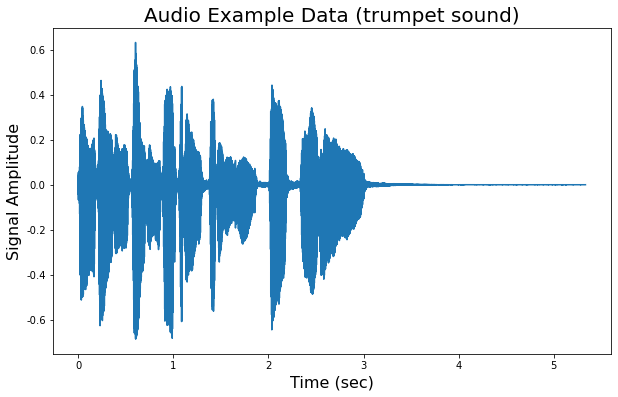

In [22]:
# y 벡터의 각 값에 해당하는 초 값이 들어있는 리스트 만들기
x = [i / sr for i in range(len(y))]

plt.figure(figsize=(10, 6))
plt.plot(x, y)
# 시간과 신호 진포 값을 시각화
plt.title('Audio Example Data (trumpet sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()

### [1초까지 시각화]

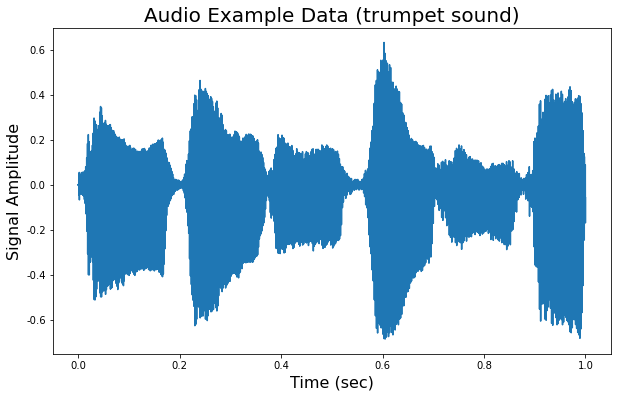

In [23]:
plt.figure(figsize=(10,6))
plt.plot(x[:sr], y[:sr])
plt.title('Audio Example Data (trumpet sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()

### [0.1초까지 시각화]

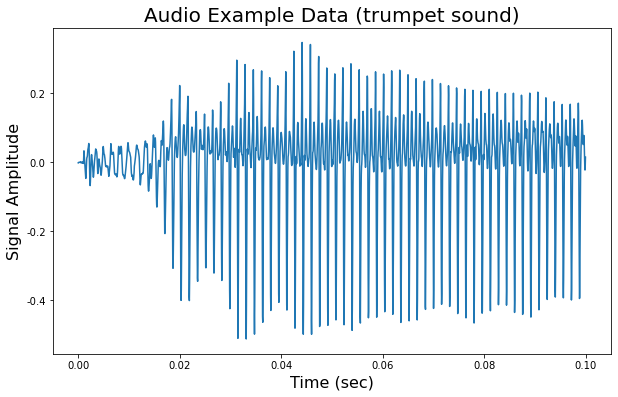

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(x[:sr//10], y[:sr//10])
plt.title('Audio Example Data (trumpet sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()

### [0.01초까지 시각화]

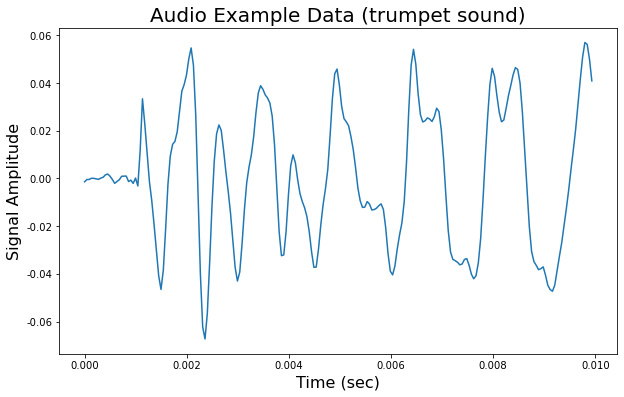

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(x[:sr//100], y[:sr//100])
plt.title('Audio Example Data (trumpet sound)', fontsize=20)
plt.xlabel('Time (sec)', fontsize=16)
plt.ylabel('Signal Amplitude', fontsize=16)
plt.show()

## 비명 데이터 & 비 비명 데이터 수집 방식
- Youtube
    + Screaming이 포함된 검색어 키워드 중심으로 크롤링 및 음성 파일로 변환
    + 비명 소리만 있는 것이 아닌 다양한 소리도 섞여 있으므로 같이 사용
- 구글 검색
    + '효과음'키워드 중심으로 검색해 다양한 블로그와 카페에서 무료로 제공된 게이터 수집
    + 비명과 헷갈릴 수 있는 소방차 사이렌, 환호 소리, 트림 소리등 추가 수집
- 직접 녹음
    + 조용한 공간에서 직접 녹음하여 수집

*데이터 레이블링 - Audacity 프로그램 사용*